In [94]:
!pip install numpy pandas

In [95]:
import numpy as np
import pandas as pd

In [96]:
df_ecom = pd.read_csv('../data/raw/train.csv')
df_ecom

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [97]:
df_ecom.columns = df_ecom.columns.str.lower().str.replace('.', '_')
df_ecom.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n'],
      dtype='object')

In [98]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  reached_on_time_y_n  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [99]:
df_ecom.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time_y_n
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [100]:
df_ecom = df_ecom.drop(columns=["id"], errors='ignore')
df_ecom.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [101]:
target_col = "reached_on_time_y_n"

num_col = df_ecom.select_dtypes(include='number').columns.tolist()

cat_col = df_ecom.select_dtypes(exclude='number').columns.tolist()

print("Target column:", target_col)
print("Numerical columns:", num_col)
print("Categorical columns:", cat_col)

Target column: reached_on_time_y_n
Numerical columns: ['customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'reached_on_time_y_n']
Categorical columns: ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']


In [102]:
df_ecom[target_col]

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: reached_on_time_y_n, Length: 10999, dtype: int64

In [103]:
df_ecom[num_col]

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time_y_n
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1
10995,4,1,232,5,6,1247,0
10996,5,4,242,5,4,1155,0
10997,5,2,223,6,2,1210,0


In [104]:
df_ecom[cat_col]

,warehouse_block,mode_of_shipment,product_importance,gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [105]:
info_cat_col = pd.DataFrame(columns=['Name', 'Number_Of_Unique_Value', 'Unique_Value_Name'])

for feature in cat_col:
    cat_df = pd.DataFrame(
        {
            'Name': feature,
            'Number_Of_Unique_Value': df_ecom[feature].nunique(),
            'Unique_Value_Name': ', '.join([str(val) for val in df_ecom[feature].unique()])
        },
        index=[0]
    )
    info_cat_col = pd.concat([info_cat_col, cat_df], ignore_index=True)

pd.set_option('display.max_colwidth', None)
display(info_cat_col)

,Name,Number_Of_Unique_Value,Unique_Value_Name
0,warehouse_block,5,"D, F, A, B, C"
1,mode_of_shipment,3,"Flight, Ship, Road"
2,product_importance,3,"low, medium, high"
3,gender,2,"F, M"


In [106]:
df_ecom[target_col].value_counts()

reached_on_time_y_n
1    6563
0    4436
Name: count, dtype: int64

In [107]:
!pip install matplotlib seaborn

In [108]:
df_ecom

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


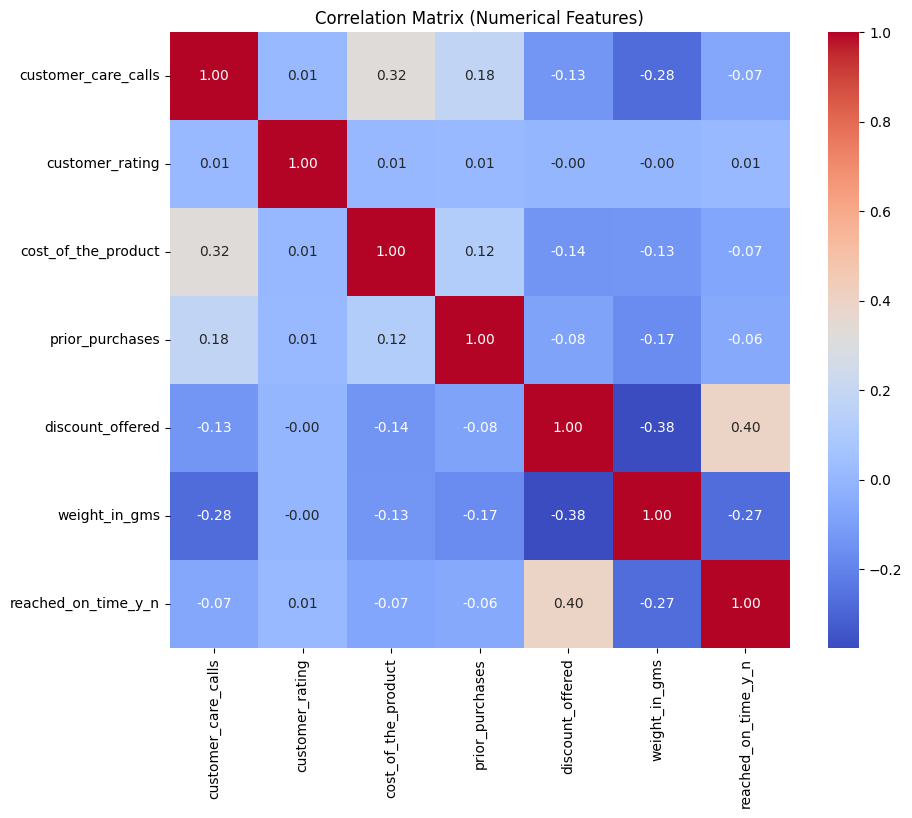

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df_ecom.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


In [110]:
!pip install scipy

In [111]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

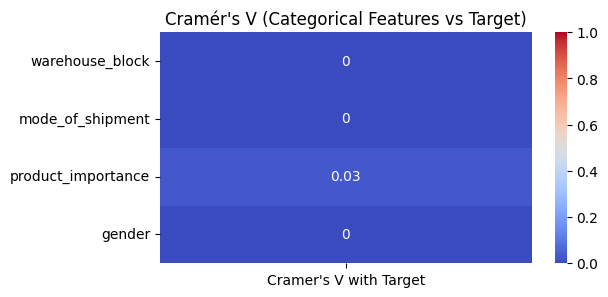

In [112]:
cat_corr = pd.DataFrame(index=cat_col, columns=["Cramer's V with Target"])
for c in cat_col:
    cat_corr.loc[c] = cramers_v(df_ecom[c], df_ecom["reached_on_time_y_n"])

plt.figure(figsize=(6,3))
sns.heatmap(cat_corr.astype(float), annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V (Categorical Features vs Target)")
plt.show()


In [113]:
!pip install scikit-learn xgboost

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [115]:
print(df_ecom.columns.tolist())

['warehouse_block', 'mode_of_shipment', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'product_importance', 'gender', 'discount_offered', 'weight_in_gms', 'reached_on_time_y_n']


In [116]:
target_col = "reached_on_time_y_n"

X = df_ecom.drop(columns=[target_col])
y = df_ecom[target_col]

In [117]:
num_col = df_ecom.select_dtypes(include='number').columns.tolist()
cat_col = df_ecom.select_dtypes(exclude='number').columns.tolist()

num_col = [c for c in num_col if c != target_col]
cat_col = [c for c in cat_col if c != target_col]

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [119]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [120]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_col),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_col)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed   = preprocessor.transform(X_val)

In [121]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42, 
                              use_label_encoder=False, eval_metric="logloss")
}

results = []
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_val_transformed)
    y_proba = model.predict_proba(X_val_transformed)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    f1  = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1-score": round(f1, 4),
        "ROC-AUC": round(auc, 4)
    })

results_df = pd.DataFrame(results)
print(results_df)

c:\Users\nghoo\AppData\Local\anaconda3\envs\e-commerce_env\lib\site-packages\xgboost\training.py:183: UserWarning: [22:32:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  F1-score  ROC-AUC
0  Logistic Regression    0.6377    0.6886   0.7172
1        Random Forest    0.6609    0.6899   0.7383
2              XGBoost    0.6486    0.6960   0.7319


In [146]:
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.6377, 0.6609, 0.6486],
    "F1-score": [0.6886, 0.6899, 0.6960],
    "ROC-AUC": [0.7172, 0.7383, 0.7319]
})

results_df.to_csv("../results/model_evaluation.csv", index=False)

print("Save as '../results/model_evaluation.csv'")

Save as '../results/model_evaluation.csv'


In [122]:
train_df = pd.concat([X_train, y_train], axis=1)
val_df  = pd.concat([X_val, y_val], axis=1)

train_df.to_csv("../data/processed/train.csv", index=False)
val_df.to_csv("../data/processed/val.csv", index=False)

print("Train and validation datasets saved to ../data/processed/")
train_df

val_df

Train and validation datasets saved to ../data/processed/


,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n
1666,C,Ship,4,5,268,3,low,F,59,2083,1
6542,A,Ship,7,5,296,4,low,F,2,1823,1
6428,A,Road,3,5,139,2,low,M,2,5839,0
8060,A,Road,5,5,186,4,low,M,3,4287,0
9822,D,Ship,3,3,149,4,low,F,2,5282,0
...,...,...,...,...,...,...,...,...,...,...,...
5428,C,Ship,5,2,121,5,medium,F,10,4790,0
8610,D,Road,5,4,228,5,low,F,9,1549,1
5664,D,Ship,4,5,216,4,medium,F,1,4458,1
7740,D,Ship,6,1,254,4,low,F,2,1071,0


In [138]:
import xgboost as xgb
import joblib

In [139]:
dtrain = xgb.DMatrix(X_train_transformed, label=y_train)
dval   = xgb.DMatrix(X_val_transformed, label=y_val)

In [140]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}


In [141]:
checkpoint_cb = xgb.callback.TrainingCheckPoint(
    directory="../models/",
    name="xgb_checkpoint",
    as_pickle=True
)

In [142]:
evals = [(dtrain, "train"), (dval, "eval")]

In [143]:
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    callbacks=[checkpoint_cb, xgb.callback.EarlyStopping(rounds=50, save_best=True)]
)

[0]	train-logloss:0.66110	eval-logloss:0.66233
[1]	train-logloss:0.64912	eval-logloss:0.65124
[2]	train-logloss:0.63791	eval-logloss:0.64068
[3]	train-logloss:0.62751	eval-logloss:0.63113
[4]	train-logloss:0.61802	eval-logloss:0.62226
[5]	train-logloss:0.60930	eval-logloss:0.61412
[6]	train-logloss:0.60136	eval-logloss:0.60677
[7]	train-logloss:0.59493	eval-logloss:0.60102
[8]	train-logloss:0.58889	eval-logloss:0.59594
[9]	train-logloss:0.58220	eval-logloss:0.59019
[10]	train-logloss:0.57593	eval-logloss:0.58460
[11]	train-logloss:0.57103	eval-logloss:0.58041
[12]	train-logloss:0.56559	eval-logloss:0.57568
[13]	train-logloss:0.56144	eval-logloss:0.57206
[14]	train-logloss:0.55657	eval-logloss:0.56772
[15]	train-logloss:0.55555	eval-logloss:0.56763
[16]	train-logloss:0.55150	eval-logloss:0.56466
[17]	train-logloss:0.54717	eval-logloss:0.56071
[18]	train-logloss:0.54299	eval-logloss:0.55704
[19]	train-logloss:0.53906	eval-logloss:0.55399
[20]	train-logloss:0.53556	eval-logloss:0.55096
[2

In [144]:
bst.save_model("../models/xgb_final.json")
print("Final model saved at ../models/xgb_final.json")

# Predict trên validation
y_proba = bst.predict(dval)
y_pred = (y_proba > 0.5).astype(int)

print("Accuracy :", accuracy_score(y_val, y_pred))
print("F1-score :", f1_score(y_val, y_pred))
print("ROC-AUC  :", roc_auc_score(y_val, y_proba))

Final model saved at ../models/xgb_final.json
Accuracy : 0.6695454545454546
F1-score : 0.6594847775175644
ROC-AUC  : 0.7403787122273062
